<a href="https://colab.research.google.com/github/Bdempsey03/DDoS_Prevention/blob/main/DDoS_Prevention_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import needed libraries

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as sk_metrics

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from google.colab import drive

# Import data

In [ ]:
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/DrDoS_UDP_clean_halved.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#extra normalization step needed
for column in data.columns:
    data[column] = data[column] / data[column].abs().max()

data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,56,57,58,59,60,61,62,63,64,Label
0,0.000000,0.920033,0.795739,0.662948,0.752566,0.101511,1.0,0.999999,1.819959e-03,0.002688,...,-9.409825e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000013,0.195622,0.795739,0.835358,0.752566,0.148207,1.0,0.999999,9.018253e-04,0.001792,...,-9.409825e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000025,0.212178,0.795739,0.863559,0.752566,0.071418,1.0,0.999999,8.714920e-04,0.001792,...,-9.409825e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000038,0.443352,0.795739,0.613963,0.752566,0.040348,1.0,0.999999,9.247253e-04,0.001792,...,-9.409825e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000050,0.728947,0.795739,0.518678,0.752566,0.257912,1.0,0.999999,8.333336e-09,0.000896,...,-9.409825e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Split into test/train

In [ ]:
data_slice = data[:80000]
train_data = data_slice.sample(frac=0.75,random_state=27)
test_data = data_slice.drop(train_data.index)
#split label into Y
x_train, y_train = train_data.iloc[:, 2:-1], train_data.iloc[:, -1]
x_test, y_test = test_data.iloc[:, 2:-1], test_data.iloc[:, -1]


In [ ]:
# Make a logistic regression model using DDoS data

clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=200, alpha=0.001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

Iteration 1, loss = 0.11126454
Iteration 2, loss = 0.05396310
Iteration 3, loss = 0.05242959
Iteration 4, loss = 0.05103864
Iteration 5, loss = 0.04968429
Iteration 6, loss = 0.04833305
Iteration 7, loss = 0.04695337
Iteration 8, loss = 0.04552856
Iteration 9, loss = 0.04408056
Iteration 10, loss = 0.04256129
Iteration 11, loss = 0.04091372
Iteration 12, loss = 0.03909511
Iteration 13, loss = 0.03718728
Iteration 14, loss = 0.03525830
Iteration 15, loss = 0.03330054
Iteration 16, loss = 0.03133096
Iteration 17, loss = 0.02943848
Iteration 18, loss = 0.02765110
Iteration 19, loss = 0.02594869
Iteration 20, loss = 0.02438591
Iteration 21, loss = 0.02297354
Iteration 22, loss = 0.02173346
Iteration 23, loss = 0.02064883
Iteration 24, loss = 0.01971893
Iteration 25, loss = 0.01893193
Iteration 26, loss = 0.01824935
Iteration 27, loss = 0.01766658
Iteration 28, loss = 0.01715075
Iteration 29, loss = 0.01668919
Iteration 30, loss = 0.01628298
Iteration 31, loss = 0.01590970
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

##Evaluate Model

In [ ]:
cnf_matrix = sk_metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

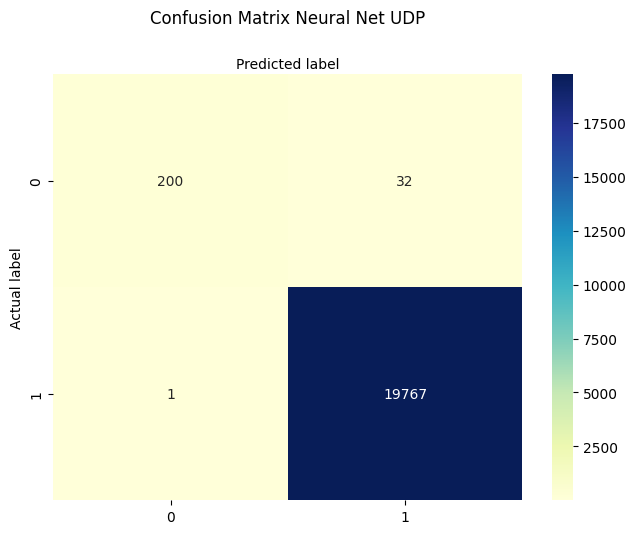

In [ ]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Neural Net UDP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
target_names = ['Legitimate Traffic','DDoS Packets']
print(classification_report(y_test, y_pred, target_names=target_names))



                    precision    recall  f1-score   support

Legitimate Traffic       1.00      0.86      0.92       232
      DDoS Packets       1.00      1.00      1.00     19768

          accuracy                           1.00     20000
         macro avg       1.00      0.93      0.96     20000
      weighted avg       1.00      1.00      1.00     20000

